In [85]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import time

In [119]:
with open('pyomo_results.pkl', 'rb') as file:
    results_pyomo = pickle.load(file)

In [122]:
# jax_diffrax_results
with open('jax_diffrax_results.pkl', 'rb') as file:
    results_jax_diffrax = pickle.load(file)

In [124]:
one_layer_keys = list(results_pyomo.keys())[:5]
results_pyomo_1l = {k: results_pyomo[k] for k in results_pyomo if k in one_layer_keys}
results_jax_diffrax_1l = {k: results_jax_diffrax[k] for k in results_jax_diffrax if k in one_layer_keys}

In [125]:
results_pyomo_2l = {k: {} for k in results_pyomo if k not in one_layer_keys}
results_jax_diffrax_2l = {k: results_jax_diffrax[k] for k in results_jax_diffrax if k not in one_layer_keys}

In [117]:
min_acc = min(min(acc_train_pm))
min_acc

0.017041534185409546

In [135]:
results_pyomo.keys()

dict_keys(['[2, 8, 2]', '[2, 16, 2]', '[2, 32, 2]', '[2, 64, 2]', '[2, 128, 2]', '[2, 8, 8, 2]', '[2, 16, 16, 2]', '[2, 32, 32, 2]'])

In [140]:
del results_pyomo['[2, 32, 32, 2]']

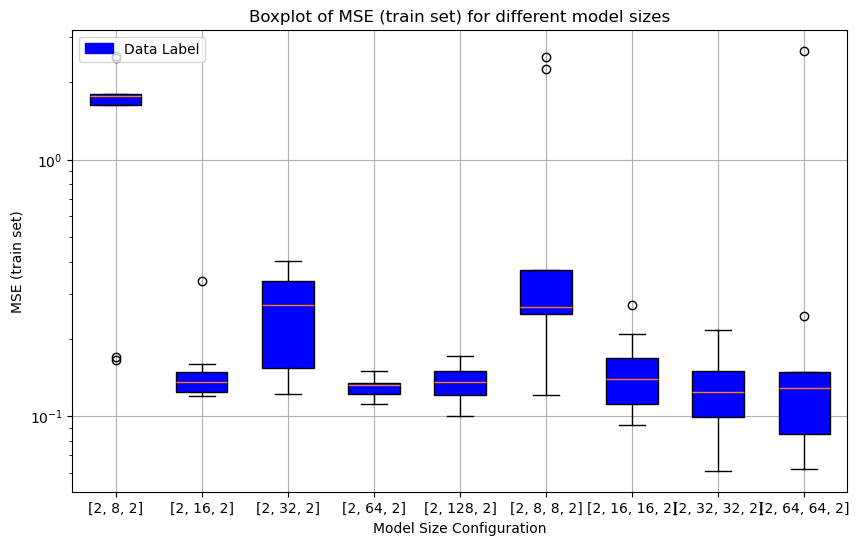

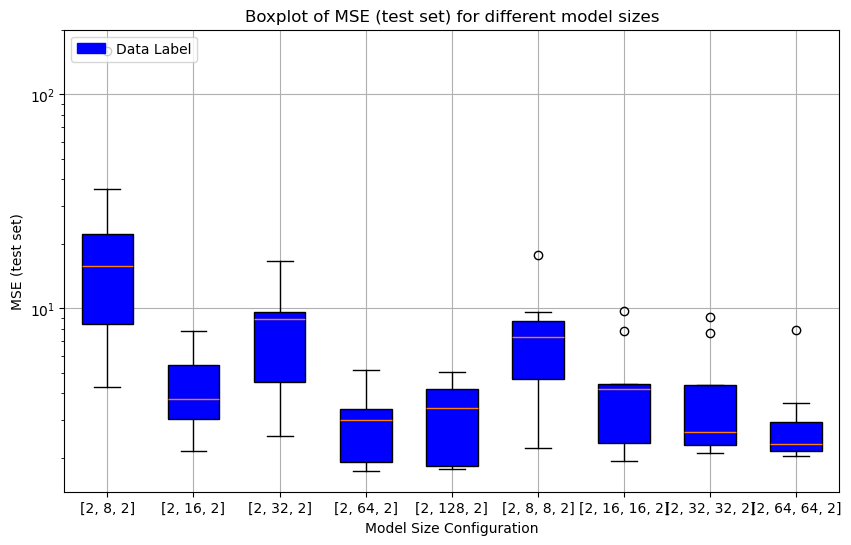

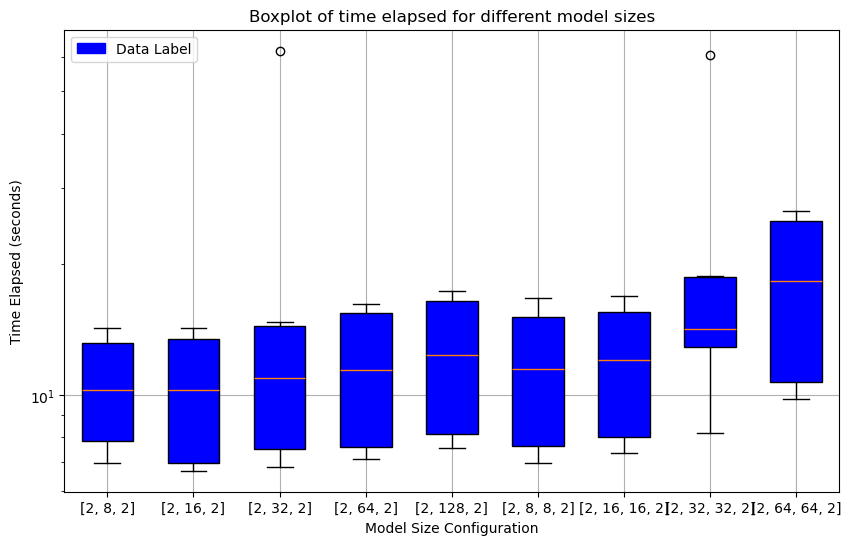

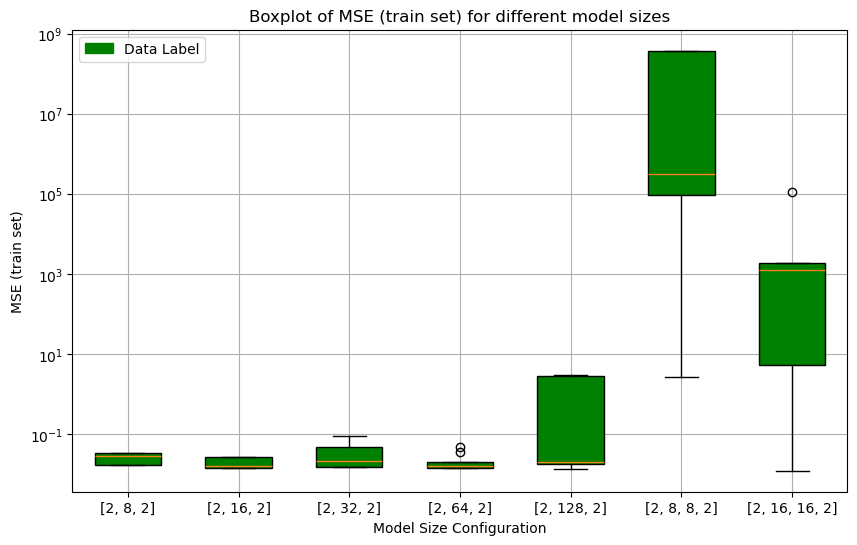

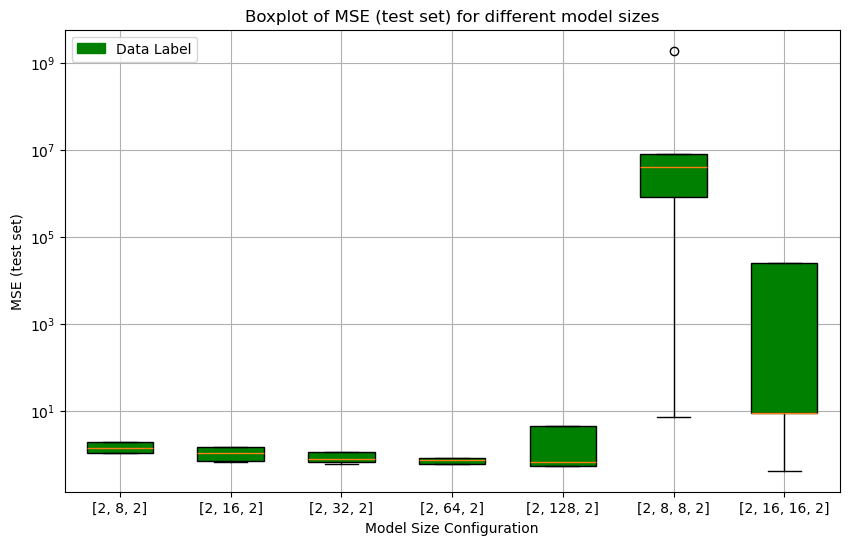

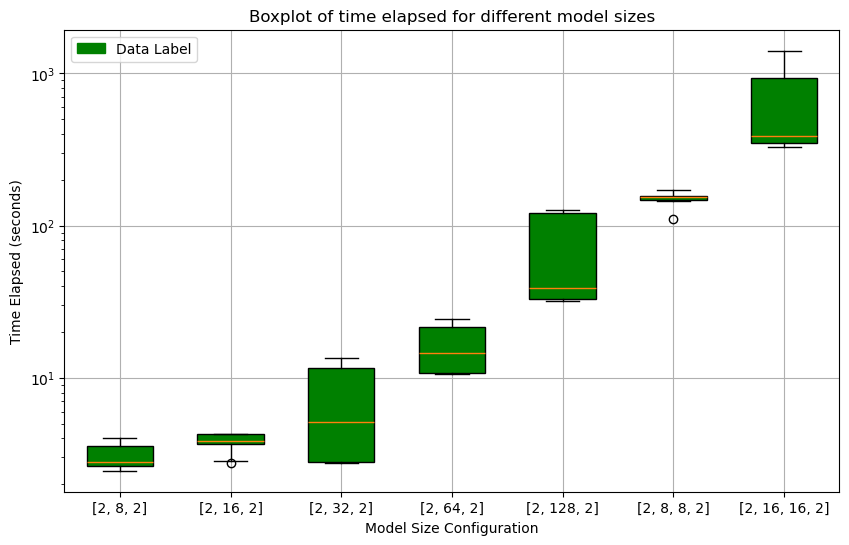

In [141]:
def collect_data(results):
    acc_train, acc_test, time = [], [], []
    for lw in results.keys():
        acc_temp_train = [results[lw][param_comb]['mse_train'].item() for param_comb in results[lw]]
        acc_temp_test = [results[lw][param_comb]['mse_test'].item() for param_comb in results[lw]]
        time_temp = [results[lw][param_comb]['time_elapsed'] for param_comb in results[lw]]
        
        acc_train.append(acc_temp_train)
        acc_test.append(acc_temp_test)
        time.append(time_temp)
    return acc_train, acc_test, time

def plot_boxplots(data1, data2, labels, title, ylabel, colors=('blue', 'green')):
    n_groups = len(data1)
    positions_1 = [2 * i + 1.1 for i in range(n_groups)]
    positions_2 = [2 * i + 1.9 for i in range(n_groups)]
    
    plt.figure(figsize=(10, 6))
    box1 = plt.boxplot(data1, positions=positions_1, widths=0.6, patch_artist=True, boxprops=dict(facecolor=colors[0]))
    box2 = plt.boxplot(data2, positions=positions_2, widths=0.6, patch_artist=True, boxprops=dict(facecolor=colors[1]))
    
    plt.title(title)
    plt.xlabel('Model Size Configuration')
    plt.ylabel(ylabel)
    plt.yscale('log')
    
    xticks = [2 * i + 1.5 for i in range(n_groups)]
    plt.xticks(ticks=xticks, labels=labels)
    
    patch1 = mpatches.Patch(color=colors[0], label='Pyomo')
    patch2 = mpatches.Patch(color=colors[1], label='Diffrax')
    
    plt.legend(handles=[patch1, patch2], loc='upper left')
    plt.grid(True)
    plt.show()
    
def plot_single_boxplot(data, labels, title, ylabel, color='blue'):
    n_groups = len(data)
    positions = [i + 1 for i in range(n_groups)]
    
    plt.figure(figsize=(10, 6))
    box = plt.boxplot(data, positions=positions, widths=0.6, patch_artist=True, boxprops=dict(facecolor=color))
    
    plt.title(title)
    plt.xlabel('Model Size Configuration')
    plt.ylabel(ylabel)
    plt.yscale('log')
    
    plt.xticks(ticks=positions, labels=labels)
    
    patch = mpatches.Patch(color=color, label='Data Label')  # Customize label as needed
    
    # plt.axhline(y=min_acc, color='r', linestyle='--', label='Minimum MSE')
    plt.legend(handles=[patch], loc='upper left')
    plt.grid(True)
    plt.show()

acc_train_jd, acc_test_jd, time_jd = collect_data(results_jax_diffrax)
min_acc = min(min(acc_train_pm))

plot_single_boxplot(acc_train_jd, list(results_jax_diffrax.keys()), 
              'Boxplot of MSE (train set) for different model sizes', 
              'MSE (train set)')

plot_single_boxplot(acc_test_jd, list(results_jax_diffrax.keys()), 
              'Boxplot of MSE (test set) for different model sizes', 
              'MSE (test set)')

plot_single_boxplot(time_jd, list(results_jax_diffrax.keys()), 
              'Boxplot of time elapsed for different model sizes', 
              'Time Elapsed (seconds)')

acc_train_pm, acc_test_pm, time_pm = collect_data(results_pyomo)

plot_single_boxplot(acc_train_pm, list(results_pyomo.keys()), 
              'Boxplot of MSE (train set) for different model sizes', 
              'MSE (train set)', 'green')

plot_single_boxplot(acc_test_pm, list(results_pyomo.keys()), 
              'Boxplot of MSE (test set) for different model sizes', 
              'MSE (test set)', 'green')

plot_single_boxplot(time_pm, list(results_pyomo.keys()), 
              'Boxplot of time elapsed for different model sizes', 
              'Time Elapsed (seconds)', 'green')


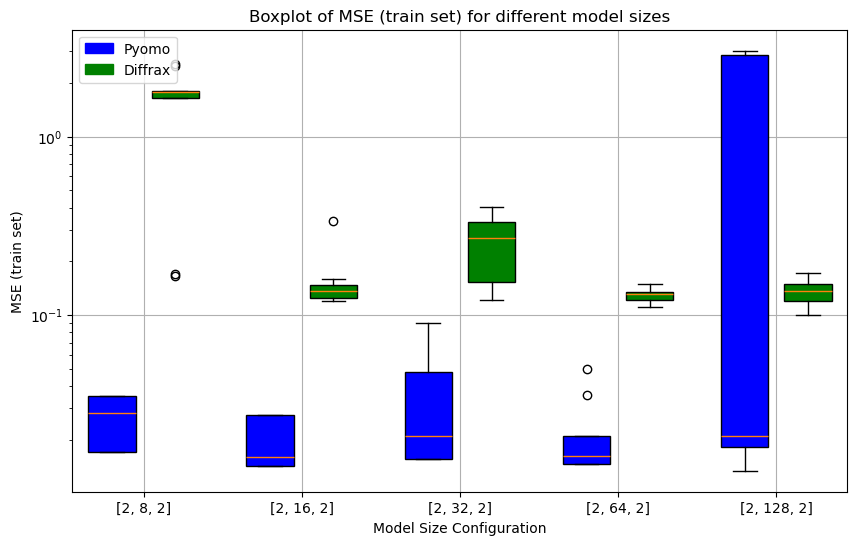

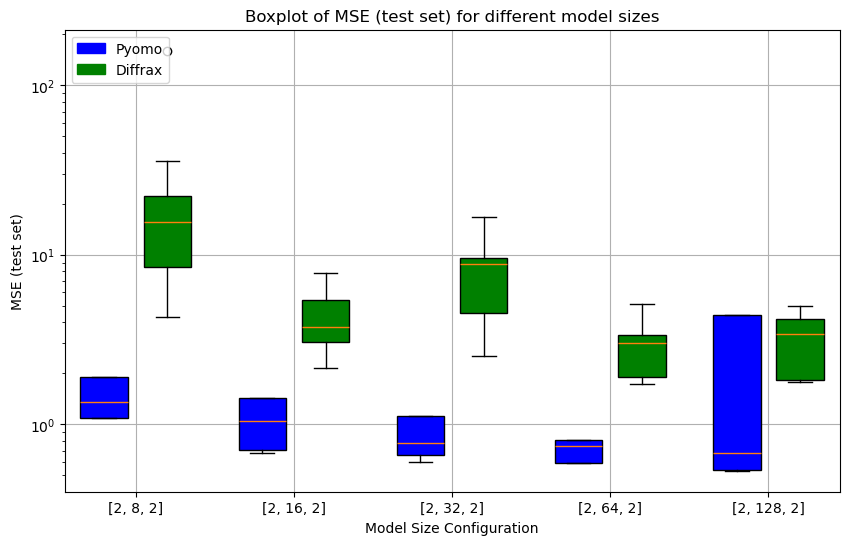

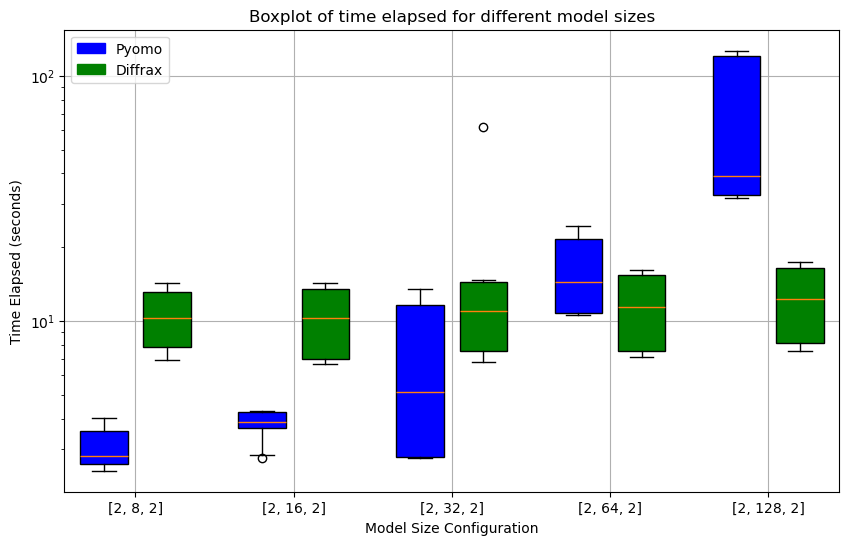

In [129]:
def collect_data(results):
    acc_train, acc_test, time = [], [], []
    for lw in results.keys():
        acc_temp_train = [results[lw][param_comb]['mse_train'].item() for param_comb in results[lw]]
        acc_temp_test = [results[lw][param_comb]['mse_test'].item() for param_comb in results[lw]]
        time_temp = [results[lw][param_comb]['time_elapsed'] for param_comb in results[lw]]
        
        acc_train.append(acc_temp_train)
        acc_test.append(acc_temp_test)
        time.append(time_temp)
    return acc_train, acc_test, time

def plot_boxplots(data1, data2, labels, title, ylabel, colors=('blue', 'green')):
    n_groups = len(data1)
    positions_1 = [2 * i + 1.1 for i in range(n_groups)]
    positions_2 = [2 * i + 1.9 for i in range(n_groups)]
    
    plt.figure(figsize=(10, 6))
    box1 = plt.boxplot(data1, positions=positions_1, widths=0.6, patch_artist=True, boxprops=dict(facecolor=colors[0]))
    box2 = plt.boxplot(data2, positions=positions_2, widths=0.6, patch_artist=True, boxprops=dict(facecolor=colors[1]))
    
    plt.title(title)
    plt.xlabel('Model Size Configuration')
    plt.ylabel(ylabel)
    plt.yscale('log')
    
    xticks = [2 * i + 1.5 for i in range(n_groups)]
    plt.xticks(ticks=xticks, labels=labels)
    
    patch1 = mpatches.Patch(color=colors[0], label='Pyomo')
    patch2 = mpatches.Patch(color=colors[1], label='Diffrax')
    
    plt.legend(handles=[patch1, patch2], loc='upper left')
    plt.grid(True)
    plt.show()

acc_train_pm, acc_test_pm, time_pm = collect_data(results_pyomo_1l)
acc_train_jd, acc_test_jd, time_jd = collect_data(results_jax_diffrax_1l)

plot_boxplots(acc_train_pm, acc_train_jd, list(results_pyomo_1l.keys()), 
              'Boxplot of MSE (train set) for different model sizes', 
              'MSE (train set)')

plot_boxplots(acc_test_pm, acc_test_jd, list(results_pyomo_1l.keys()), 
              'Boxplot of MSE (test set) for different model sizes', 
              'MSE (test set)')

plot_boxplots(time_pm, time_jd, list(results_pyomo_1l.keys()), 
              'Boxplot of time elapsed for different model sizes', 
              'Time Elapsed (seconds)')
